In [15]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import sympy
import math
from scipy import stats as stats
from scipy.stats import norm as norm

It's more likely that sevens would be rolled than snake eyes, because there are multiple ways to make seven out of the numbers 1-6, but there is only one way to make snake eyes.

The probability of rolling snake eyes is $\frac{1}{36}$, but the probability of rolling 7 is $\frac{6}{36}= \frac{1}{6}$. The ratio of these probabilities are 1:6. 

$\begin{table}[]
\begin{tabular}{ll}
\textbf{Number (Sum)} & \textbf{Probability} \\
2                     & 1/36                 \\
3                     & 2/36                 \\
4                     & 3/36                 \\
5                     & 4/36                 \\
6                     & 5/36                 \\
7                     & 6/36                 \\
8                     & 5/36                 \\
9                     & 4/36                 \\
10                    & 3/36                 \\
11                    & 2/36                 \\
12                    & 1/36                
\end{tabular}
\end{table}$

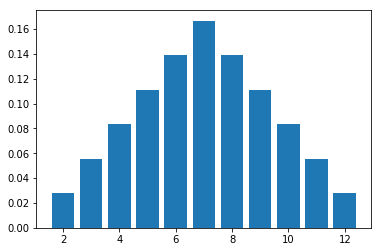

In [25]:
#2) Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 
#six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition 
#of the values (x-axis on histogram).
die1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
die2 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

dist = np.convolve(die1, die2)
vals= np.linspace(2, 12, num = 11)

plt.bar(vals, dist)
plt.show()

In [26]:
#3) Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure 
#your result makes sense.

mean = 0
vararray = []
for index in range(11):
    #x coord*y coord
    mean += (dist[index]*vals[index])

print("Mean of values ", mean)

for index in range(11):
    vararray.append((vals[index]-mean)**2 * dist[index])

print("Variance of values: ", sum(vararray))

Mean of values  7.0
Variance of values:  5.833333333333334


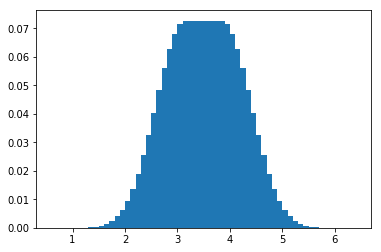

In [39]:
#4) Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.
die1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
die2 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

dist = np.convolve(die1, die2)

for index in range(8):
    dist =np.convolve(dist, die2);
    
vals = []
for i in range(10, 61):
    vals.append(i/10)

plt.bar(vals, dist)
plt.show()

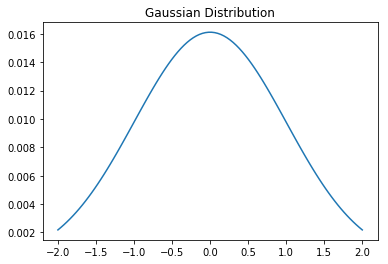

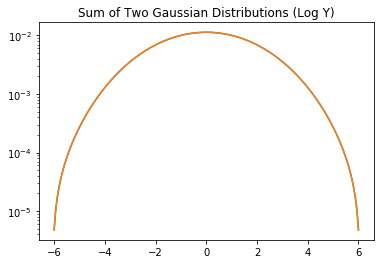

In [52]:
#5) Show that the sum and average of an initially Gaussian distribution is also a Gaussian (can be analytic or numerical). 

#Single normal gaussian plot
x = np.linspace(-2, 2, 100)
pdf = stats.norm.pdf(x) *(x[1]-x[0])

plt.plot(x, pdf)
plt.title("Gaussian Distribution")
plt.show()

#Sum of two covnolutions
x_vals = np.linspace(-6, 6, 199)
pdf_sum = np.convolve(pdf,pdf) 

plt.plot(x_vals, pdf_sum)
plt.title("Sum of Two Gaussian Distributions")

plt.semilogy(x_vals, pdf_sum)
plt.title("Sum of Two Gaussian Distributions (Log Y)")

plt.show()

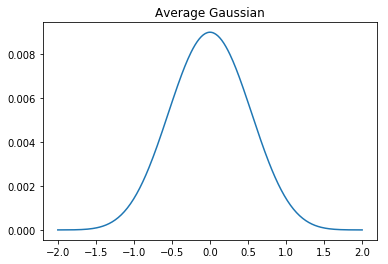

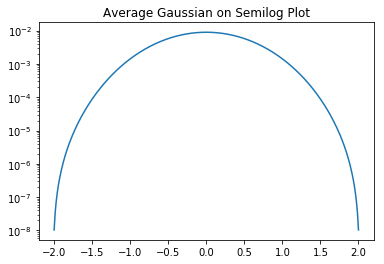

In [54]:
#Average Gaussian
x_vals_triple = np.linspace(-6, 6, 298)/3
pdf_sum_triple = np.convolve(pdf_sum, pdf) 

plt.plot(x_vals_triple, pdf_sum_triple)
plt.title('Average Gaussian')
plt.show()

plt.semilogy(x_vals_triple, pdf_sum_triple)
plt.title('Average Gaussian on Semilog Plot')
plt.show()

How does the standard deviation of the resulting sum or average Gaussian change? This is a hugely important result. Explore what this means for integrating a signal over time.

In [59]:
variance = 0
for index in range(0,len(pdf)):
    variance += (x_vals[index]**2)*pdf[index]
st_dev = np.sqrt(variance)
print("Unaltered Standard Deviation = ", st_dev)

variance = 0
for index in range(0,len(pdf_sum)):
    variance += (x_vals[index]**2)*pdf_sum[index]
st_dev = np.sqrt(variance)
print("Sum Standard Deviation = ", st_dev)

variance = 0
for index in range(0,len(pdf_sum_triple)):
    variance += (x_vals_triple[index]**2)*pdf_sum_triple[index]
st_dev = np.sqrt(variance)
print("Average Standard Deviation = ", st_dev)

Unaltered Standard Deviation =  3.2079702079296277
Sum Standard Deviation =  1.793504559008171
Average Standard Deviation =  0.4774331270377955


The standard deviation of an average of several Gaussian distributions results in a much  lower standard deviation than a single gaussian dstribution, the same goes for a sum of Gaussian distributions. This means that these altered forms will not display the same variance as the original signal, and interpreting the un